In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

In [2]:
# Load the CSV data into a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Split the data into features (X) and target (y)
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [5]:
# Perform feature scaling using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model on the training data
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 3ms/step - loss: 0.6395 - accuracy: 0.6240
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7851
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.8388
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8471
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8636
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8595
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8595
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8595
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8595
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.2946 - accuracy: 0.8678


In [7]:
# Evaluate the model on the training and test data
train_accuracy = model.evaluate(X_train_scaled, y_train)[1]
test_accuracy = model.evaluate(X_test_scaled, y_test)[1]

2/2 [==============================] - 0s 7ms/step - loss: 0.4412 - accuracy: 0.8033


In [8]:
print('Accuracy on Training data:', train_accuracy)
print('Accuracy on Test data:', test_accuracy)

Accuracy on Training data: 0.8677685856819153
Accuracy on Test data: 0.8032786846160889


In [9]:
# Perform predictions on the test data
y_test_pred_prob = model.predict(X_test_scaled)
y_test_pred = np.round(y_test_pred_prob).flatten()

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

2/2 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



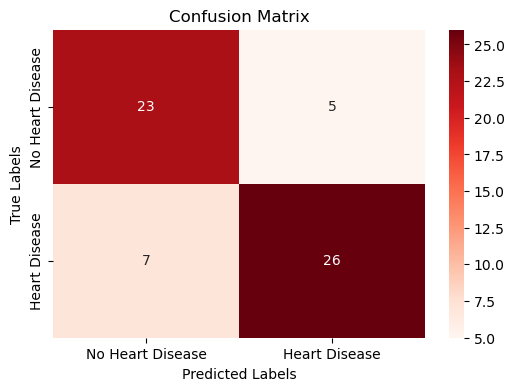

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [10]:
# Save the trained model to a file using pickle
filename = 'heart_disease_model_ANN.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)